In [1]:
import pandas as pd

df= pd.read_csv('Data.csv')

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [3]:
df['diagnosis']= df['diagnosis'].map({'M':1, 'B':0})

In [11]:
#train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split into train and test sets — this creates y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC AUC: 0.99737962659679


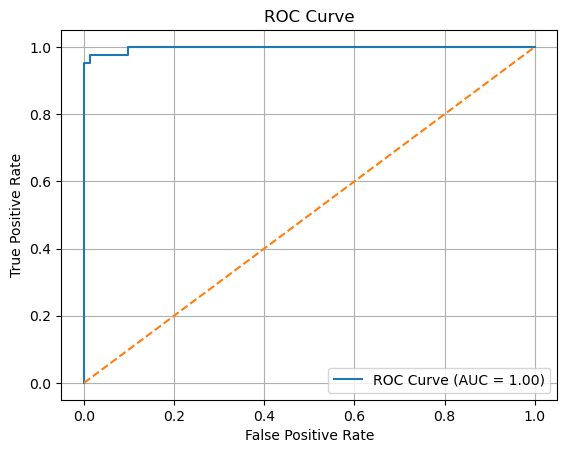

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test_scaled)

# Probabilities for ROC
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision & Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np

# Custom threshold
threshold = 0.3  # example: lower threshold to catch more malignant cases
y_custom_pred = (y_prob >= threshold).astype(int)

# Evaluate again
cm_custom = confusion_matrix(y_test, y_custom_pred)
print("Custom Threshold Confusion Matrix:\n", cm_custom)
print("Precision (custom):", precision_score(y_test, y_custom_pred))
print("Recall (custom):", recall_score(y_test, y_custom_pred))


Custom Threshold Confusion Matrix:
 [[67  4]
 [ 1 42]]
Precision (custom): 0.9130434782608695
Recall (custom): 0.9767441860465116
